In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

In [3]:
dados = pd.read_csv('flights.csv')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [4]:
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


In [5]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [6]:
dados.describe(include= 'O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [8]:
#Após uma breve analise estatística, iremos realizar uma análise com gráficos.

In [9]:
import matplotlib.pyplot as plt

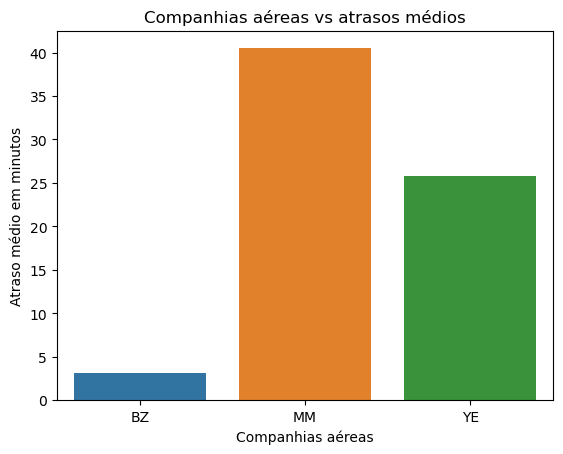

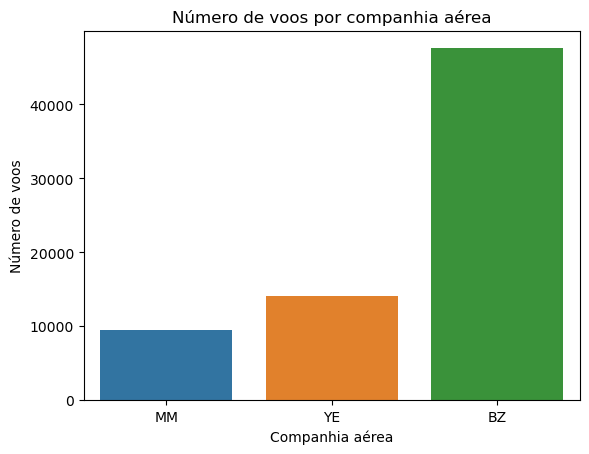

In [10]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

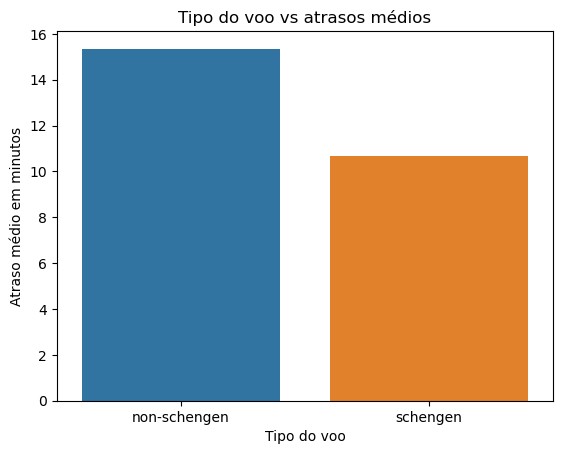

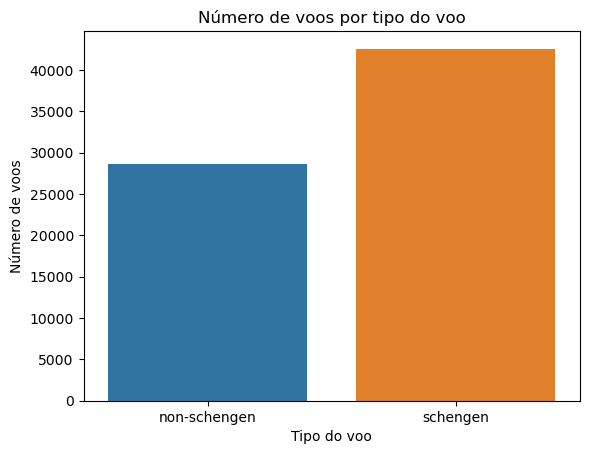

In [11]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

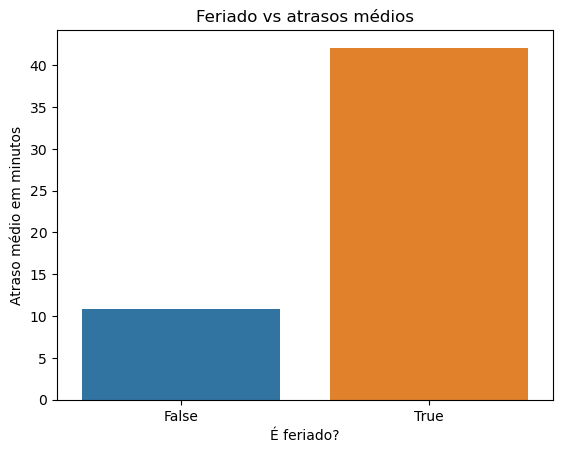

In [12]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

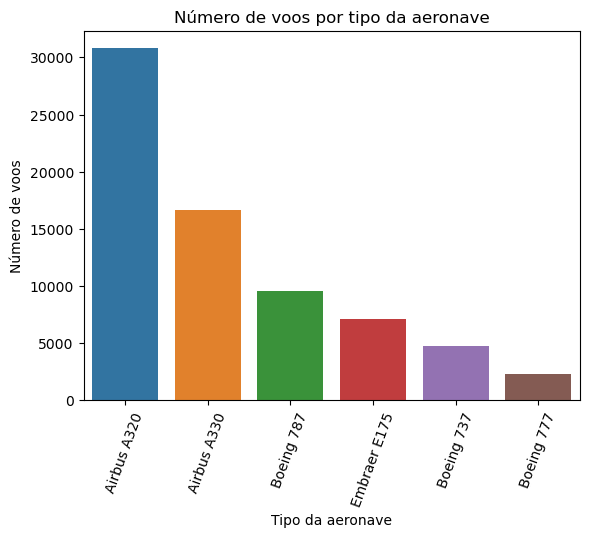

In [13]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

In [14]:
#Após uma análise precisa por meio de gráficos, iremos identificar padrões nessas varáveis.

<AxesSubplot:xlabel='arrival_time', ylabel='Count'>

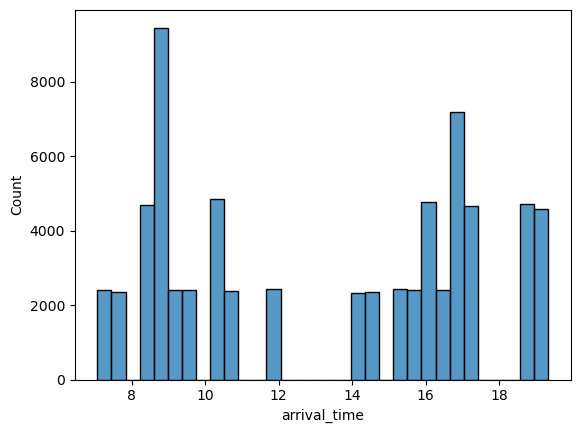

In [15]:
sns.histplot(data= dados, x = "arrival_time")

<AxesSubplot:xlabel='arrival_time', ylabel='Count'>

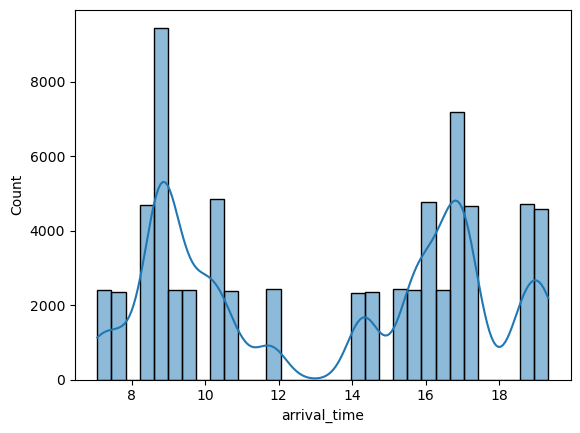

In [16]:
sns.histplot(data=dados, x='arrival_time', kde=True)

In [17]:
def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

<AxesSubplot:xlabel='arrival_time', ylabel='Count'>

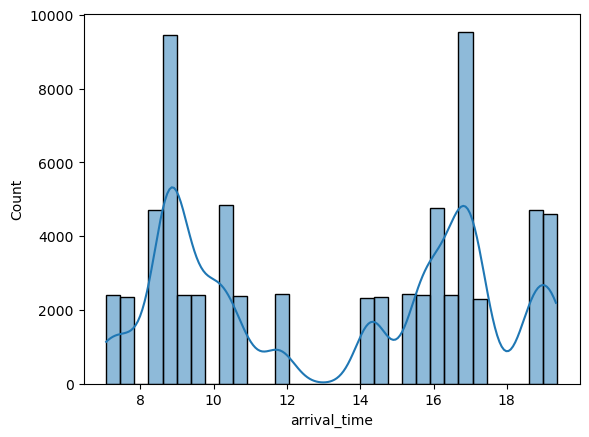

In [18]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)

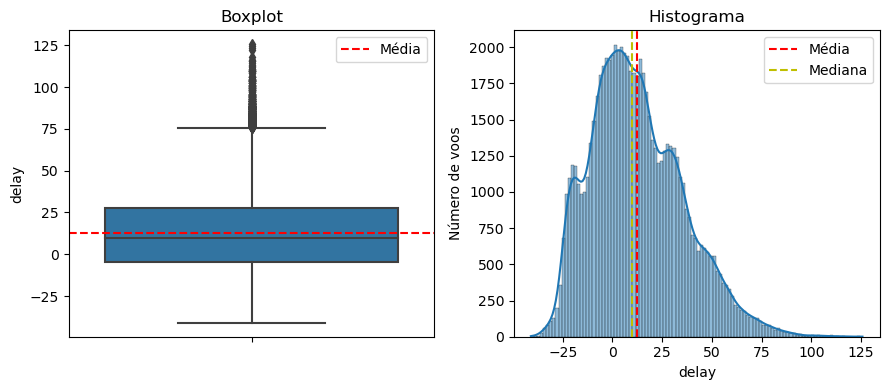

In [19]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

In [20]:
#Até aqui, conseguimos extrair análises dos dados, com uma análise exploratória, de forma estatistica e gráfica. Agora iniciaremos a preparação dos featurins para iniciar o modelo de machinie learning 

In [21]:
dados.head(1)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981


In [22]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), format = '%Y-%j')

In [23]:
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [24]:
dados['date'].dt.weekday

0        4
1        4
2        4
3        4
4        4
        ..
71170    5
71171    5
71172    5
71173    5
71174    5
Name: date, Length: 71175, dtype: int64

In [25]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5,6])

In [26]:
dados['day_name'] = dados['date'].dt.day_name()
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


In [27]:
#Modelar as variáveis categóricas para que haja possibilidade de leitura em um projeto de machine learning

In [28]:
dados.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

In [29]:
dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})

0        0
1        0
2        1
3        0
4        0
        ..
71170    1
71171    0
71172    1
71173    1
71174    1
Name: schengen, Length: 71175, dtype: int64

In [30]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [31]:
dados.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

In [32]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

In [33]:
pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int).head(2)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0


In [34]:
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Agora seguimos com análise de correlação de variáveis


In [37]:
dados[['arrival_time', 'departure_time']]

,arrival_time,departure_time
0,8.885071,10.885071
1,8.939996,11.939996
2,18.635384,22.635384
3,15.967963,17.967963
4,16.571894,19.571894
...,...,...
71170,18.635384,22.635384
71171,16.718722,21.718722
71172,8.564949,13.564949
71173,9.344097,12.344097


In [38]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [ ]:
#remoção de variáveis 

In [40]:
df_encoded.drop(["flight_id", "departure_time", "day", "year", "date"], axis=1)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,18.635384,1,25.677277,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
71171,0,16.718722,1,52.624348,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
71172,1,8.564949,1,56.167080,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
71173,1,9.344097,1,56.758844,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [41]:
df_clean = df_encoded.drop(["flight_id", "departure_time", "day", "year", "date"], axis=1)

In [42]:
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Iniciar o treinamento do DummyRegressor 

In [43]:
x = df_clean.drop(['delay'], axis= 1)
y = df_clean['delay']

In [45]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [46]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(x_train, y_train)

DummyRegressor()

In [47]:
y_pred_dummy = model_dummy.predict(x_test)

In [48]:
y_pred_dummy

array([12.52857512, 12.52857512, 12.52857512, ..., 12.52857512,
       12.52857512, 12.52857512])

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metricas = {'Raiz do Erro Quadrático Médio': round(rmse, 4),'Erro Absoluto Médio': round(mae, 4),'R2 Score': round(r2, 4)}
    return metricas

In [52]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio': 23.2241,
 'Erro Absoluto Médio': 18.6127,
 'R2 Score': -0.0}

In [57]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do Erro Quadrático Médio': 13.2426,
 'Erro Absoluto Médio': 10.6075,
 'R2 Score': 0.6749}

In [60]:
model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do Erro Quadrático Médio': 13.7301,
 'Erro Absoluto Médio': 11.0138,
 'R2 Score': 0.6505}

In [66]:
!pip install yellowbrick


     -------------------------------------- 282.6/282.6 kB 1.9 MB/s eta 0:00:00


C:\Users\cfluc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


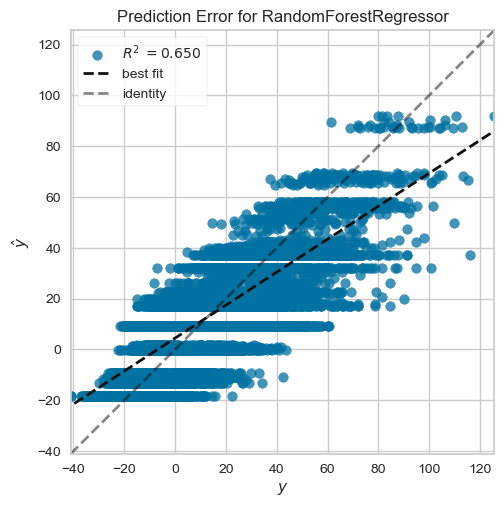

In [67]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, x_train, y_train, x_test, y_test)

C:\Users\cfluc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


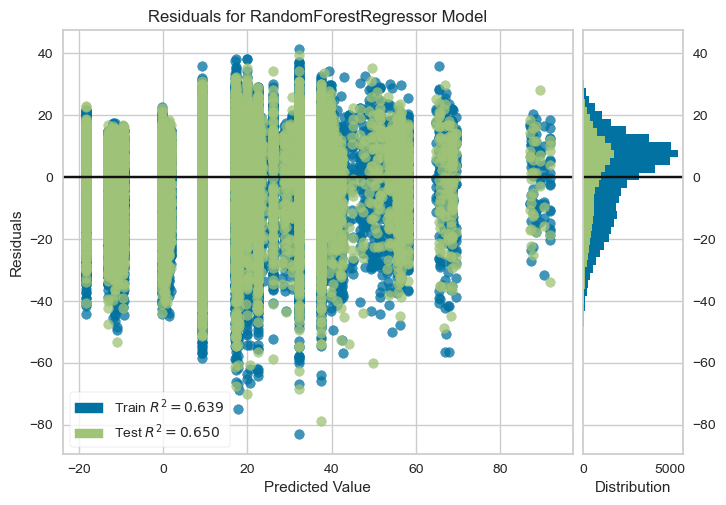

In [70]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, x_train, y_train, x_test, y_test)

In [72]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, x_train, y_train, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([20.15449142, 12.11180425, 15.78830552, 15.12155962, 12.97090888]),
 'score_time': array([0.24019694, 0.12777233, 0.22912335, 0.1410749 , 0.13794231]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [73]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f' {val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------------------------')

MAE Scores: [' -11.074', ' -11.303', ' -11.056', ' -11.145', ' -11.174']
MAE Média: -11.151, Std: 0.088
----------------------------------------------------------------------------------
RMSE Scores: [' -13.767', ' -14.049', ' -13.793', ' -13.877', ' -13.930']
RMSE Média: -13.883, Std: 0.101
----------------------------------------------------------------------------------
R2 Scores: [' 0.647', ' 0.624', ' 0.645', ' 0.641', ' 0.635']
R2 Média: 0.638, Std: 0.008
----------------------------------------------------------------------------------


In [ ]:
#Entender as features mais importantes 

C:\Users\cfluc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


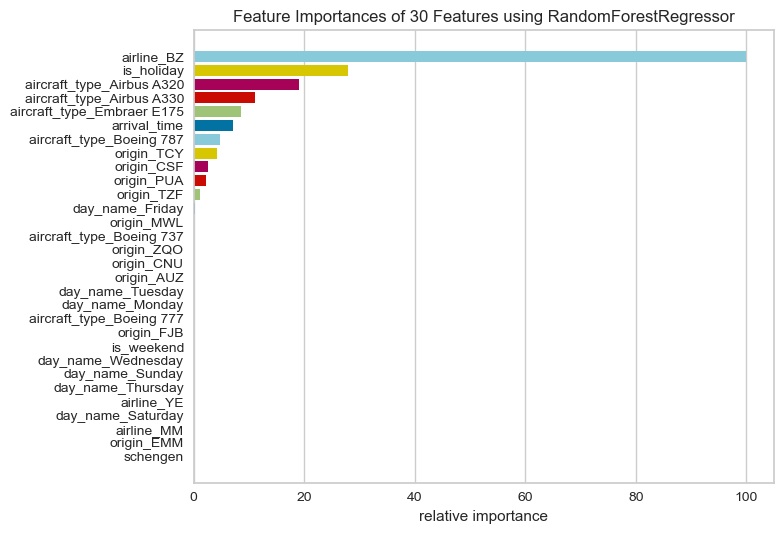

<AxesSubplot:title={'center':'Feature Importances of 30 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [74]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf)
viz.fit(x_train, y_train)
viz.show()

C:\Users\cfluc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


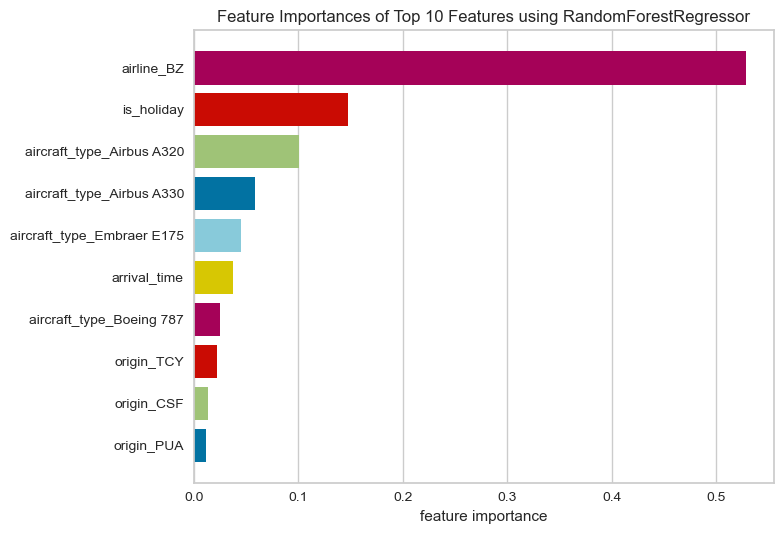

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [76]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(x_train, y_train)
viz.show()

In [78]:
importances = model_rf.feature_importances_
pd.DataFrame({'Feature': x.columns, 'Importances': importances})

,Feature,Importances
0,schengen,0.000001
1,arrival_time,0.037614
2,is_holiday,0.147833
3,is_weekend,0.000055
4,airline_BZ,0.528604
5,airline_MM,0.000016
6,airline_YE,0.000025
7,aircraft_type_Airbus A320,0.100719
8,aircraft_type_Airbus A330,0.058221
9,aircraft_type_Boeing 737,0.000470


In [81]:
importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'Features': x.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)


,Features,Importances
4,airline_BZ,0.528604
2,is_holiday,0.147833
7,aircraft_type_Airbus A320,0.100719
8,aircraft_type_Airbus A330,0.058221
12,aircraft_type_Embraer E175,0.045619
1,arrival_time,0.037614
11,aircraft_type_Boeing 787,0.024663
20,origin_TCY,0.022120
15,origin_CSF,0.013979
19,origin_PUA,0.011385


In [83]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in [1, 5, 10, 15, 20, 25, 30]:
    selected_features = feature_importances['Features'].values[:count]

x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

model_selected_features.fit(x_train_selected, y_train)

y_pred = model_selected_features.predict(x_test_selected)

metricas = calcular_metricas_regressao(y_test, y_pred)

results_df[count] = list(metricas.values())

results_df

,30
RMSE,13.7301
MAE,11.0138
R2,0.6505


In [84]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):
    selected_features = feature_importances['Features'].values[:count]

x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

model_selected_features.fit(x_train_selected, y_train)

y_pred = model_selected_features.predict(x_test_selected)

metricas = calcular_metricas_regressao(y_test, y_pred)

results_df[count] = list(metricas.values())

results_df

,15
RMSE,13.7406
MAE,11.0253
R2,0.6499


In [87]:
selected_features = feature_importances['Features'].values[:13]
x_selected_features = x[selected_features]
    

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x_selected_features, y, random_state=42)

In [89]:
param_grid = {
'max_depth': [5, 10, 15],
'min_samples_leaf': [1, 2, 3],
'min_samples_split': [2, 4, 6],
'n_estimators': [100, 150, 200]
}

In [90]:
from sklearn.model_selection import GridSearchCV

In [92]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2', cv=cv)

model_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [93]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [94]:
metricas = calcular_metricas_regressao(y_test, y_pred)

In [95]:
y_pred_model_grid = model_grid.predict(x_test)

metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

{'Raiz do Erro Quadrático Médio': 13.2635,
 'Erro Absoluto Médio': 10.6731,
 'R2 Score': 0.6738}

In [96]:
results_df[count] = list(metricas.values())

In [97]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

,15,model_grid
RMSE,13.7406,13.2635
MAE,11.0253,10.6731
R2,0.6499,0.6738


In [98]:
import pickle

In [102]:
try:
    with open('model_producao.pkl', 'wb') as file: 
        pickle.dump(model_grid.best_estimator_, file) 
    print('Modelo salvo com sucesso!!!')
except Exception as e:
    print ('Ocorreu um erro ao salvar o modelo: ', str(e))

Modelo salvo com sucesso!!!
